# Homework III 

## Image Preparation

In [ ]:
!wget https://drive.google.com/uc?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL  -O Homeworks/Homework_3/images/kitty55.png
!wget https://drive.google.com/uc?id=11wi3AkNNpyvbOuJlGAHHrpyCesO6_d2I  -O Homeworks/Homework_3/images/coins.zip
!wget https://drive.google.com/uc?id=1B2DdZ4MPuCcEr9sXSy9g5bR9nD7veBOR  -O Homeworks/Homework_3/images/pyri.zip
!wget https://drive.google.com/uc?id=15Qs_2kJ7scBEDLc8YQ2bi0U6PKiLpnmn  -O Homeworks/Homework_3/images/gemini.jpg

!unzip Homeworks/Homework_3/images/coins.zip -d Homeworks/Homework_3/images
!unzip Homeworks/Homework_3/images/pyri.zip -d Homeworks/Homework_3/images

!rm -rf Homeworks/Homework_3/images/coins.zip 
!rm -rf Homeworks/Homework_3/images/pyri.zip

--2025-11-19 17:48:40--  https://drive.google.com/uc?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL
Resolving drive.google.com (drive.google.com)... 142.250.204.206, 2404:6800:4003:c05::64, 2404:6800:4003:c05::65, ...
Connecting to drive.google.com (drive.google.com)|142.250.204.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL [following]
--2025-11-19 17:48:40--  https://drive.usercontent.google.com/download?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.66.97, 2404:6800:4016:808::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.66.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112875 (110K) [image/png]
Saving to: ‘Homeworks/Homework_3/images/kitty55.png’

Homeworks/Homework_ 100%[===================>] 110.23K  --.-KB/s    in 0.1s    

2025

^C


## Part I

In [1]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

In [2]:
# ---------------------------------------------------------
# ส่วนที่ 1: เตรียมรูปภาพ (โหลดจาก URL หรืออัพโหลดเอง)
# ---------------------------------------------------------
img = Image.open("Homeworks/Homework_3/images/selected_image.jpg")

In [3]:
# ---------------------------------------------------------
# ส่วนที่ 2: นิยาม 5 เทคนิค Augmentation (ตามโจทย์ข้อ 1)
# ---------------------------------------------------------

# 1. Random Horizontal Flip (กลับด้านซ้ายขวา)
# เหมาะสำหรับเพิ่มข้อมูลในกรณีที่วัตถุหันหน้าไปทางไหนก็ได้
transform_1 = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1.0), # p=1.0 คือบังคับให้กลับด้านเพื่อให้เห็นผลชัดเจน
    transforms.Resize((224, 224)),          # ปรับขนาดให้เท่ากัน
    transforms.ToTensor(),
])

# 2. Color Jitter (ปรับแต่งสีและความสว่าง)
# จำลองสภาพแสงที่แตกต่างกัน (สว่างมาก, มืด, สีเพี้ยน)
transform_2 = transforms.Compose([
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.1),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# 3. Gaussian Blur (ทำภาพเบลอ)
# จำลองภาพที่หลุดโฟกัส หรือภาพที่มีความละเอียดต่ำ
transform_3 = transforms.Compose([
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# 4. Random Affine (Shear/บิดภาพ)
# การบิดภาพช่วยให้โมเดลเรียนรู้วัตถุในมุมมองที่ผิดเพี้ยนไปจากปกติ
transform_4 = transforms.Compose([
    transforms.RandomAffine(degrees=0, translate=None, scale=None, shear=20),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# 5. Random Grayscale (เปลี่ยนเป็นขาวดำ)
# ช่วยให้โมเดลโฟกัสที่รูปร่าง (Shape/Texture) มากกว่าสี
transform_5 = transforms.Compose([
    transforms.RandomGrayscale(p=1.0),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# รวมเทคนิคทั้งหมดไว้ใน List เพื่อนำไปวนลูปแสดงผล
aug_list = [transform_1, transform_2, transform_3, transform_4, transform_5]
aug_names = ["1. Horizontal Flip", "2. Color Jitter", "3. Gaussian Blur", "4. Affine (Shear)", "5. Grayscale"]

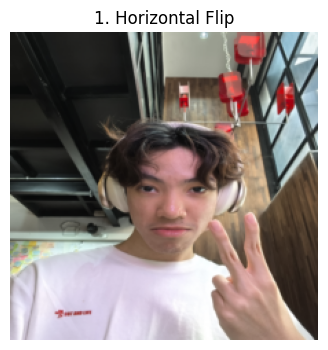

In [4]:
aug_tensor = transform_1(img)
aug_image = aug_tensor.permute(1, 2, 0) # ย้าย dimension เพื่อ plot กราฟ

plt.figure(figsize=(4, 4))
plt.imshow(aug_image)
plt.title(aug_names[0])
plt.axis('off')
plt.show()

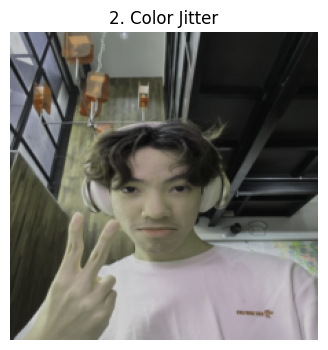

In [5]:
aug_tensor = transform_2(img)
aug_image = aug_tensor.permute(1, 2, 0) # ย้าย dimension เพื่อ plot กราฟ

plt.figure(figsize=(4, 4))
plt.imshow(aug_image)
plt.title(aug_names[1])
plt.axis('off')
plt.show()

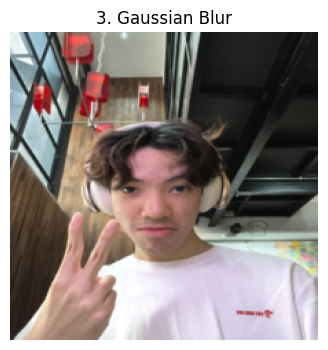

In [6]:
aug_tensor = transform_3(img)
aug_image = aug_tensor.permute(1, 2, 0) # ย้าย dimension เพื่อ plot กราฟ

plt.figure(figsize=(4, 4))
plt.imshow(aug_image)
plt.title(aug_names[2])
plt.axis('off')
plt.show()

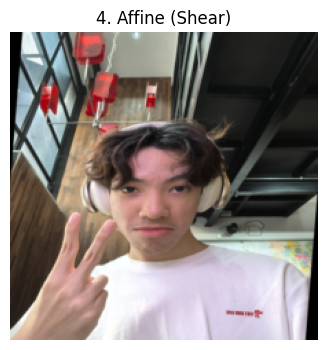

In [7]:
aug_tensor = transform_4(img)
aug_image = aug_tensor.permute(1, 2, 0) # ย้าย dimension เพื่อ plot กราฟ

plt.figure(figsize=(4, 4))
plt.imshow(aug_image)
plt.title(aug_names[3])
plt.axis('off')
plt.show()

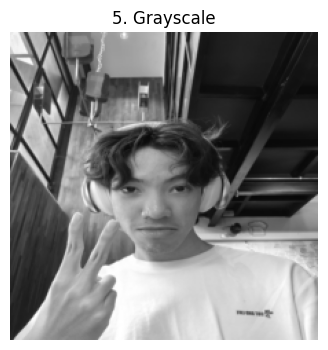

In [8]:
aug_tensor = transform_5(img)
aug_image = aug_tensor.permute(1, 2, 0) # ย้าย dimension เพื่อ plot กราฟ

plt.figure(figsize=(4, 4))
plt.imshow(aug_image)
plt.title(aug_names[4])
plt.axis('off')
plt.show()

## Part II

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def count_thai_coins_hough(image_path, param2=30, min_dist=50, sat_thresh=35):
    """
    ฟังก์ชันนับและแยกประเภทเหรียญไทยด้วย Hough Transform
    
    Parameters:
    - image_path: ที่อยู่ไฟล์รูป
    - param2: ความเข้มงวดในการหาวงกลม (ค่าน้อย = เจอวงกลมง่าย/เยอะ, ค่ามาก = เจอเฉพาะวงกลมชัดๆ)
    - min_dist: ระยะห่างต่ำสุดระหว่างจุดศูนย์กลางเหรียญ (ถ้าวางชิดกันมากให้ลดค่านี้)
    - sat_thresh: ค่าความสดของสี (Saturation) สำหรับแยกเหรียญทอง (2, 10) ออกจากเหรียญเงิน (1, 5)
    """
    
    # 1. อ่านไฟล์ภาพ
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: ไม่สามารถอ่านไฟล์ {image_path} ได้")
        return

    output_img = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # 2. Preprocessing: Blur เพื่อลด Noise (สำคัญมากสำหรับ Hough)
    gray_blurred = cv2.GaussianBlur(gray, (13, 13), 0)

    # 3. Apply Hough Circle Transform
    circles = cv2.HoughCircles(
        gray_blurred, 
        cv2.HOUGH_GRADIENT, 
        dp=1.2, 
        minDist=min_dist,
        param1=50,       # Canny High Threshold
        param2=param2,   # Accumulator Threshold (ตัวแปรสำคัญ)
        minRadius=50,    # รัศมีต่ำสุด
        maxRadius=100    # รัศมีสูงสุด
    )

    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        coin_data = []

        # 4. Feature Extraction (ดึงค่าสีและขนาด)
        for (x, y, r) in circles:
            # ตัดภาพเฉพาะส่วนเหรียญ (ROI)
            roi = img[y-r:y+r, x-r:x+r]
            
            # ป้องกัน Error กรณีตัดภาพออกนอกกรอบ
            if roi.size == 0: continue
            
            # แปลงเป็น HSV เพื่อหาค่า Saturation (ความสดของสี)
            hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
            
            # หาค่าเฉลี่ย Saturation ตรงกลางเหรียญ (เพื่อเลี่ยงขอบแสงสะท้อน)
            h, w = hsv.shape[:2]
            center_roi = hsv[int(h*0.2):int(h*0.8), int(w*0.2):int(w*0.8)]
            sat_mean = np.mean(center_roi[:, :, 1]) 
            
            coin_data.append({
                'x': x, 'y': y, 'r': r, 
                'sat': sat_mean
            })

        # 5. Classification Logic (แยกประเภท)
        # เรียงลำดับตามขนาดใหญ่ -> เล็ก เพื่อเปรียบเทียบ
        coin_data.sort(key=lambda c: c['r'], reverse=True)
        
        if not coin_data:
            print("No valid coins processed.")
            return

        max_r = coin_data[0]['r'] # ขนาดเหรียญใหญ่สุดในภาพ (สมมติว่าเป็น 10 หรือ 5)
        results = {10: 0, 5: 0, 2: 0, 1: 0}
        total_val = 0

        for c in coin_data:
            x, y, r, sat = c['x'], c['y'], c['r'], c['sat']
            
            # คำนวณสัดส่วนขนาดเทียบกับเหรียญใหญ่สุด
            ratio = r / max_r
            
            # เช็คว่าเป็นเหรียญทองหรือไม่ (ดูค่า Saturation)
            is_gold = sat > sat_thresh 

            val = 0
            
            # --- Logic Tree ---
            if ratio > 0.9: # กลุ่มเหรียญใหญ่ (10 หรือ 5)
                if is_gold:
                    val = 10 # ใหญ่ + ทอง = 10
                elif sat > 20: 
                    val = 10 # กรณี 10 บาทที่แสงซีด (ยังมีสีมากกว่า 5 บาท)
                else:
                    val = 5  # ใหญ่ + เงิน = 5
            
            elif ratio > 0.78: # กลุ่มขนาดกลาง (5 หรือ 2)
                if is_gold:
                    val = 2 # ขนาดกลาง + ทอง = 2 (บางที 2 บาทวางใกล้กล้อง)
                else:
                    val = 5 # ขนาดกลาง + เงิน = 5
            
            else: # กลุ่มขนาดเล็ก (2 หรือ 1)
                if is_gold:
                    val = 2 # เล็ก + ทอง = 2
                else:
                    val = 1 # เล็ก + เงิน = 1
            
            # Refine Logic (ดักจับกรณีผิดพลาด)
            # ถ้าได้ 10 บาท แต่ Saturation ต่ำมาก ให้ปัดเป็น 5
            if val == 10 and sat < 15: val = 5
            
            # บันทึกผล
            results[val] += 1
            total_val += val

            # วาดผลลัพธ์ลงภาพ
            cv2.circle(output_img, (x, y), r, (0, 255, 0), 2) # วงกลมสีเขียว
            cv2.circle(output_img, (x, y), 2, (0, 0, 255), 3) # จุดกลาง
            
            # เขียนข้อความ (ราคา)
            text = f"{val}"
            cv2.putText(output_img, text, (x-10, y+5), cv2.FONT_HERSHEY_SIMPLEX, 
                        0.8, (255, 0, 0), 2)

        # 6. แสดงผลทาง Console และรูปภาพ
        filename = os.path.basename(image_path)
        print("=" * 40)
        print(f"File: {filename}")
        print(f"Parameters: param2={param2}, min_dist={min_dist}")
        print("-" * 20)
        print(f"Detection Results:")
        for k in [10, 5, 2, 1]:
            if results[k] > 0:
                print(f"  {k} Baht: {results[k]} coins")
        print(f"Total Value: {total_val} Baht")
        print("=" * 40)

        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
        plt.title(f"{filename} : Total {total_val} THB")
        plt.axis('off')
        plt.show()

    else:
        print(f"No circles detected in {image_path}. Try decreasing 'param2'.")

กำลังประมวลผลไฟล์: Homeworks/Homework_3/images/coins/Coin_1.png
File: Coin_1.png
Parameters: param2=30, min_dist=75
--------------------
Detection Results:
  10 Baht: 4 coins
  5 Baht: 4 coins
  2 Baht: 2 coins
  1 Baht: 2 coins
Total Value: 66 Baht


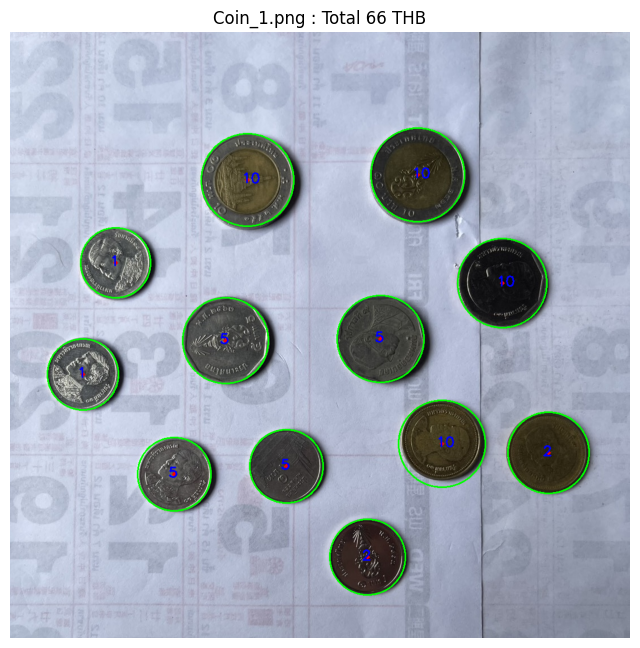

กำลังประมวลผลไฟล์: Homeworks/Homework_3/images/coins/Coin_2.png
File: Coin_2.png
Parameters: param2=30, min_dist=75
--------------------
Detection Results:
  10 Baht: 6 coins
  5 Baht: 5 coins
  2 Baht: 8 coins
  1 Baht: 9 coins
Total Value: 110 Baht


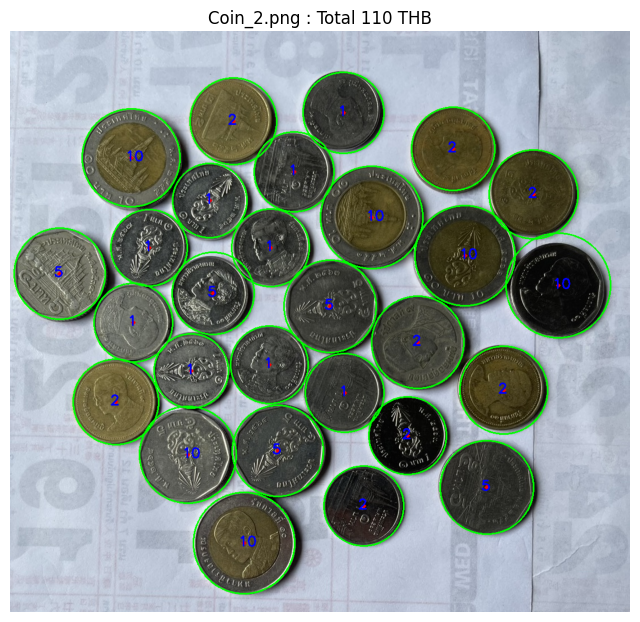

กำลังประมวลผลไฟล์: Homeworks/Homework_3/images/coins/Coin_3.png
File: Coin_3.png
Parameters: param2=30, min_dist=75
--------------------
Detection Results:
  10 Baht: 1 coins
  5 Baht: 1 coins
  2 Baht: 47 coins
  1 Baht: 7 coins
Total Value: 116 Baht


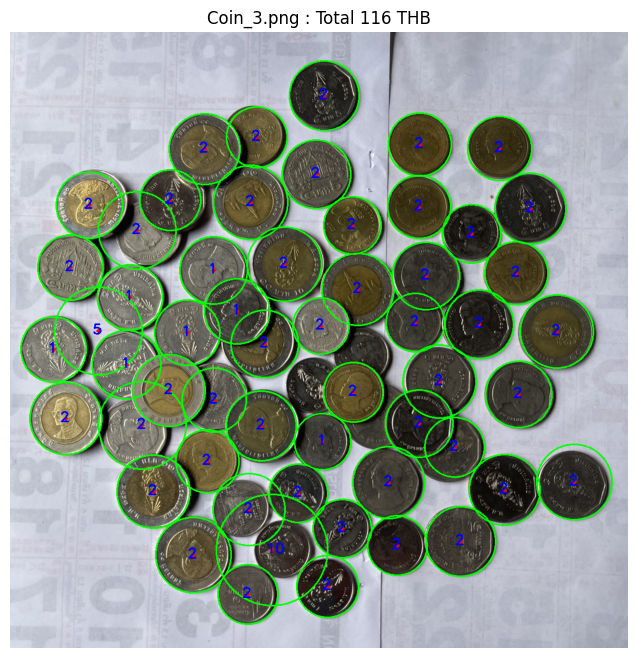

กำลังประมวลผลไฟล์: Homeworks/Homework_3/images/coins/Coin_4.png
File: Coin_4.png
Parameters: param2=30, min_dist=75
--------------------
Detection Results:
  10 Baht: 4 coins
  5 Baht: 1 coins
  2 Baht: 20 coins
  1 Baht: 23 coins
Total Value: 108 Baht


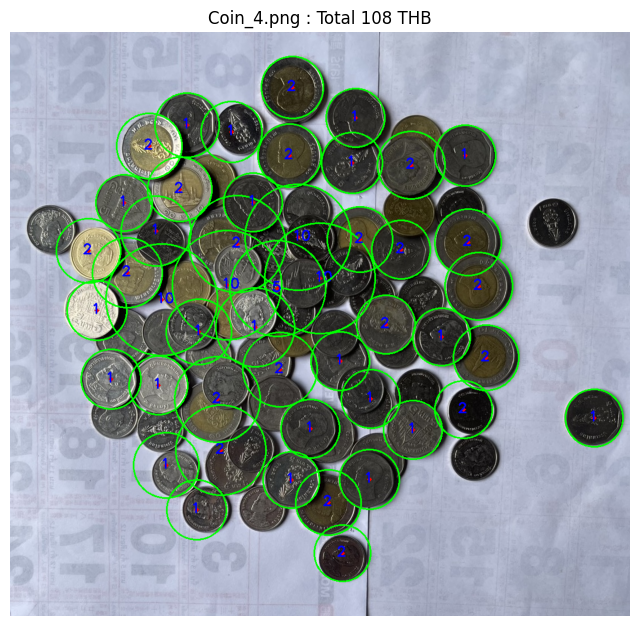

In [10]:
import glob
import os

COINS_DIR = 'Homeworks/Homework_3/images/coins'

# 1. รวบรวมรายชื่อไฟล์ทั้งหมด (ยังไม่เรียง)
image_paths = (
    glob.glob(os.path.join(COINS_DIR, '*.png')) +
    glob.glob(os.path.join(COINS_DIR, '*.jpg')) +
    glob.glob(os.path.join(COINS_DIR, '*.jpeg'))
)

if not image_paths:
    print(f"ไม่พบไฟล์รูปภาพในโฟลเดอร์: {COINS_DIR}")
else:
    # 2. เรียงลำดับรายชื่อไฟล์ตามชื่อ (Alphabetical/Lexicographical order)
    # ฟังก์ชัน sorted() จะส่งคืนลิสต์ใหม่ที่เรียงลำดับแล้ว
    sorted_image_paths = sorted(image_paths) 
    
    for full_img_path in sorted_image_paths: # ใช้ลิสต์ที่ถูกเรียงแล้วในการวนลูป
        print(f"กำลังประมวลผลไฟล์: {full_img_path}")
        # ฟังก์ชัน count_thai_coins จะได้รับ Full Path ของไฟล์
        count_thai_coins_hough(full_img_path, param2=30, min_dist=75, sat_thresh=35)

## Part III - Vision Transformers With MNIST

In [11]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

In [12]:
# 1. Multi-Head Self-Attention (แก้ไขให้เก็บ Attention Weights)
class MultiHeadSelfAttention(nn.Module):
    def __init__(self, dim, num_heads=4):
        super().__init__()
        self.num_heads = num_heads
        self.head_dim = dim // num_heads
        self.scale = self.head_dim ** -0.5
        self.qkv = nn.Linear(dim, dim * 3)
        self.proj = nn.Linear(dim, dim)
        self.attn_weights = None # <--- เพิ่มตัวแปรเก็บค่า

    def forward(self, x):
        B, N, D = x.shape
        qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, self.head_dim)
        q, k, v = qkv[:, :, 0], qkv[:, :, 1], qkv[:, :, 2]
        q, k, v = q.transpose(1, 2), k.transpose(1, 2), v.transpose(1, 2)
        
        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = F.softmax(attn, dim=-1)
        
        self.attn_weights = attn.detach() # <--- เก็บค่า Attention Map ไว้ตรงนี้
        
        out = (attn @ v).transpose(1, 2).reshape(B, N, D)
        return self.proj(out)

# 2. Transformer Encoder Block (เหมือนเดิม)
class TransformerEncoder(nn.Module):
    def __init__(self, dim, num_heads=4, mlp_ratio=4):
        super().__init__()
        self.norm1 = nn.LayerNorm(dim)
        self.attn = MultiHeadSelfAttention(dim, num_heads)
        self.norm2 = nn.LayerNorm(dim)
        self.mlp = nn.Sequential(
            nn.Linear(dim, dim * mlp_ratio),
            nn.GELU(),
            nn.Linear(dim * mlp_ratio, dim)
        )

    def forward(self, x):
        x = x + self.attn(self.norm1(x))
        x = x + self.mlp(self.norm2(x))
        return x

# 3. Positional Encoding (เหมือนเดิม)
class PositionalEncoding2D(nn.Module):
    def __init__(self, num_patches, dim):
        super().__init__()
        grid_size = int(math.sqrt(num_patches))
        self.register_buffer("pos_embed", self.build_2d_sincos(dim, grid_size))

    def build_2d_sincos(self, dim, grid):
        dim_half = dim // 2
        grid_y, grid_x = torch.meshgrid(
            torch.arange(grid, dtype=torch.float32),
            torch.arange(grid, dtype=torch.float32),
            indexing="ij"
        )
        pos_x = self.get_1d_sincos(grid_x.flatten(), dim_half)
        pos_y = self.get_1d_sincos(grid_y.flatten(), dim_half)
        pos = torch.cat([pos_x, pos_y], dim=1)
        return pos.unsqueeze(0)

    def get_1d_sincos(self, pos, dim):
        omega = torch.arange(dim // 2, dtype=torch.float32) / (dim / 2)
        omega = 1. / (10000 ** omega)
        out = pos[:, None] * omega[None, :]
        sin, cos = torch.sin(out), torch.cos(out)
        return torch.cat([sin, cos], dim=1)

    def forward(self, x):
        return x + self.pos_embed.to(x.device)

# 4. MiniViT (เหมือนเดิม)
class MiniViT(nn.Module):
    def __init__(self, img_size=28, patch_size=7, dim=64, depth=2, num_heads=4, num_classes=10):
        super().__init__()
        self.patch_size = patch_size
        self.num_patches = (img_size // patch_size) ** 2
        patch_dim = patch_size * patch_size
        self.patch_embed = nn.Linear(patch_dim, dim)

        self.class_token = nn.Parameter(torch.zeros(1, 1, dim))
        self.pos_embed = PositionalEncoding2D(self.num_patches, dim)

        self.blocks = nn.ModuleList([TransformerEncoder(dim, num_heads) for _ in range(depth)])
        self.norm = nn.LayerNorm(dim)
        self.head = nn.Linear(dim, num_classes)

    def forward(self, x):
        B, C, H, W = x.shape
        patches = x.unfold(2, self.patch_size, self.patch_size).unfold(3, self.patch_size, self.patch_size)
        patches = patches.contiguous().view(B, C, -1, self.patch_size * self.patch_size).mean(1)
        x = self.patch_embed(patches)

        cls_token = self.class_token.expand(B, -1, -1)
        x = torch.cat((cls_token, x), dim=1)

        x[:, 1:] = self.pos_embed(x[:, 1:])

        for blk in self.blocks:
            x = blk(x)

        x = self.norm(x)
        cls_output = x[:, 0]
        return self.head(cls_output)

In [13]:
# Dataset + Split + Training

# Transform
transform = transforms.Compose([transforms.ToTensor()])

# Load MNIST full train set (60,000 images)
full_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Split train / val
train_size = int(0.8 * len(full_trainset))   # 48,000
val_size = len(full_trainset) - train_size   # 12,000
generator = torch.Generator().manual_seed(42)
trainset, valset = random_split(full_trainset, [train_size, val_size], generator=generator)

# Test set (10,000 images)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Dataloaders
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
valloader = DataLoader(valset, batch_size=64, shuffle=False)
testloader = DataLoader(testset, batch_size=1000, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MiniViT().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)



# Training Loop (with Validation)

num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for imgs, labels in trainloader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        preds = model(imgs)
        loss = criterion(preds, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Validation
    model.eval()
    val_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for imgs, labels in valloader:
            imgs, labels = imgs.to(device), labels.to(device)
            preds = model(imgs)
            val_loss += criterion(preds, labels).item()
            correct += (preds.argmax(1) == labels).sum().item()
            total += labels.size(0)
    val_acc = correct / total * 100

    print(f"Epoch [{epoch+1}/{num_epochs}] | Train Loss: {train_loss/len(trainloader):.4f} | "
          f"Val Loss: {val_loss/len(valloader):.4f} | Val Acc: {val_acc:.2f}%")

# Evaluate on Test Set
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for imgs, labels in testloader:
        imgs, labels = imgs.to(device), labels.to(device)
        preds = model(imgs)
        correct += (preds.argmax(1) == labels).sum().item()
        total += labels.size(0)

print(f"\n Test Accuracy: {100*correct/total:.2f}%")


Epoch [1/5] | Train Loss: 0.6944 | Val Loss: 0.2501 | Val Acc: 92.41%
Epoch [2/5] | Train Loss: 0.1919 | Val Loss: 0.1879 | Val Acc: 94.35%
Epoch [3/5] | Train Loss: 0.1416 | Val Loss: 0.1499 | Val Acc: 95.43%
Epoch [4/5] | Train Loss: 0.1168 | Val Loss: 0.1264 | Val Acc: 96.20%
Epoch [5/5] | Train Loss: 0.0997 | Val Loss: 0.1136 | Val Acc: 96.36%

 Test Accuracy: 97.00%


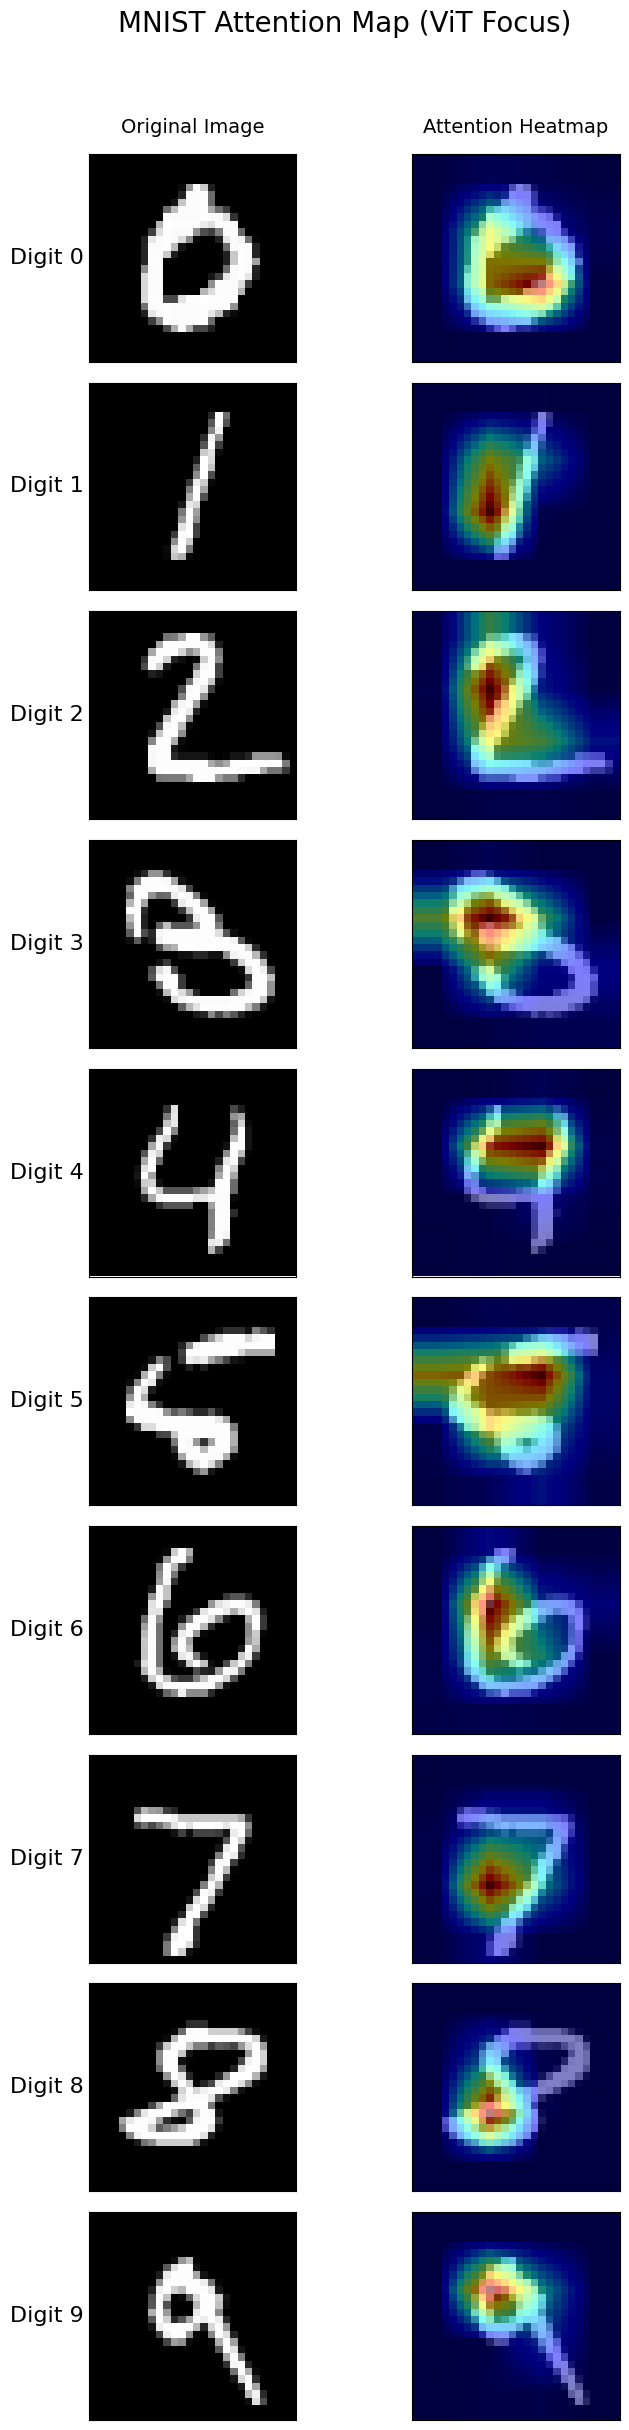

In [15]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math

def visualize_attention_0_to_9(model, loader, device):
    model.eval()
    
    # 1. หาตัวอย่างภาพตัวเลข 0-9 ให้ครบ
    target_digits = set(range(10))
    found_images = {}
    
    for imgs, labels in loader:
        for i in range(len(labels)):
            digit = labels[i].item()
            if digit in target_digits:
                found_images[digit] = imgs[i].unsqueeze(0).to(device)
                target_digits.remove(digit)
            if not target_digits:
                break
        if not target_digits:
            break
            
    # 2. สร้างกราฟแสดงผล
    # ปรับขนาด figsize ให้กว้างขึ้นเล็กน้อย (6 -> 8) เพื่อให้มีที่หายใจด้านข้าง
    fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(8, 25))
    
    # ปรับตำแหน่ง Title ใหญ่ให้สูงขึ้น (y=0.99)
    fig.suptitle("MNIST Attention Map (ViT Focus)", fontsize=20, y=0.99)
    
    for digit in range(10):
        img_tensor = found_images[digit]
        
        # Forward Pass
        with torch.no_grad():
            _ = model(img_tensor)
            
        # --- ดึงค่า Attention ---
        attn_map = model.blocks[-1].attn.attn_weights 
        attn_mean = attn_map.mean(dim=1).squeeze(0) 
        cls_attn = attn_mean[0, 1:] 
        
        grid_size = int(math.sqrt(cls_attn.shape[0]))
        attn_grid = cls_attn.reshape(grid_size, grid_size).cpu().numpy()
        attn_resized = cv2.resize(attn_grid, (28, 28))
        attn_resized = (attn_resized - attn_resized.min()) / (attn_resized.max() - attn_resized.min())
        
        # --- Plotting ---
        orig_img = img_tensor.cpu().squeeze().numpy()
        
        # รูปซ้าย: Original
        axes[digit, 0].imshow(orig_img, cmap='gray')
        
        # ปรับ Label "Digit X" ให้ตัวใหญ่ขึ้นและห่างจากรูป (labelpad=30)
        axes[digit, 0].set_ylabel(f"Digit {digit}", fontsize=16, rotation=0, labelpad=30, va='center')
        axes[digit, 0].set_xticks([])
        axes[digit, 0].set_yticks([])
        
        # รูปขวา: Attention Overlay
        axes[digit, 1].imshow(orig_img, cmap='gray')
        axes[digit, 1].imshow(attn_resized, cmap='jet', alpha=0.5)
        axes[digit, 1].set_xticks([])
        axes[digit, 1].set_yticks([])
        
        # ใส่ Title แค่แถวแรก และดันขึ้นไปหน่อย (pad=10)
        if digit == 0:
            axes[digit, 0].set_title("Original Image", fontsize=14, pad=15)
            axes[digit, 1].set_title("Attention Heatmap", fontsize=14, pad=15)

    # ใช้ rect เพื่อเว้นที่ด้านบน และ h_pad เพื่อเว้นระยะห่างระหว่างบรรทัด
    plt.tight_layout(rect=[0, 0.02, 1, 0.97], h_pad=1.5)
    plt.show()

# เรียกใช้งานฟังก์ชัน
visualize_attention_0_to_9(model, testloader, device)